In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example Page
We are scraping data from pages of pitchers on [Baseball-Reference](https://www.baseball-reference.com/). Below is an example of one player's page, how the specific statistics were found in tags, tags were parsed into lists, then those lists were concatonated and then placed into a dataframe. This process can then be repeated on each page for different players to create a larger data set for analysis and modeling.

In [4]:
#Pull url for Liam Hendricks career
url = 'https://www.baseball-reference.com/players/h/hendrli01.shtml'
ex_page = requests.get(url)
#Read Liam Hendricks into a soup variable
ex_soup = BeautifulSoup(ex_page.text,'html')

#Identify the name of the player whose page we are on, place that in the name variable

name = ex_soup.find('div',attrs = {'itemtype':'https://schema.org/Person'}).find('span').text

#Find our column headers and place them in our dataframe
header = ex_soup.find('thead')
columns = ['Name']+[col.get_text() for col in header.find_all('th')] + ['HD','SV_Oppo','Blown_SV']
example = pd.DataFrame(columns = columns)

#Identify the rows we wish to scrape
rows = ex_soup.find_all('tr', attrs = {'class': 'full', 'id':re.compile("pitching_standard.")})

#Read all rows into lists, add them to a temporary data frame, then concatonate them with our final dataframe
SV_poptips = []
for row in rows:
    #Tags for the year and other stats are different, so they are added separately
    stats = [name]
    stats1 = [stat1.get_text() for stat1 in row.find_all('th')]
    stats2 = [stat2.get_text() for stat2 in row.find_all('td')]
    
    SV_poptips = row.find('td',attrs = {'class':re.compile('right poptip'), 'data-stat':'SV'})

    pop = str(SV_poptips.get('data-tip'))
    pop_list = pop.split('<br>')
    blown_SV = pop_list[1]
    SV_oppo = pop_list[2]
    holds = pop_list[4]
    holds_list = holds.split('&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: ')
    SV_oppo_list = SV_oppo.split('(S+BS): ')
    blown_SV_list = blown_SV.split('BlownSaves&nbsp;: ')
    expanded_saves = [int(holds_list[1]), int(SV_oppo_list[1]), int(blown_SV_list[1])]
    
    stats = stats + stats1 +stats2 + expanded_saves
    

    #Temporary dataframe
    temp_df = pd.DataFrame(stats).transpose()
    temp_df.columns = columns
    
    example = pd.concat([example,temp_df])
    
example

,Name,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Awards,HD,SV_Oppo,Blown_SV
0,Liam Hendriks,2011,22,MIN,AL,0,2,.000,6.17,4,4,0,0,0,0,23.1,29,16,16,3,6,0,16,0,0,1,100,67,4.10,1.500,11.2,1.2,2.3,6.2,2.67,,0,0,0
0,Liam Hendriks,2012,23,MIN,AL,1,8,.111,5.59,16,16,0,1,0,0,85.1,106,61,53,17,26,3,50,4,0,4,381,73,5.57,1.547,11.2,1.8,2.7,5.3,1.92,,0,0,0
0,Liam Hendriks,2013,24,MIN,AL,1,3,.250,6.85,10,8,1,0,0,0,47.1,67,39,36,10,14,1,34,3,0,1,224,60,5.44,1.711,12.7,1.9,2.7,6.5,2.43,,0,0,0
0,Liam Hendriks,2014,25,TOT,AL,1,2,.333,5.23,9,6,0,0,0,0,32.2,38,21,19,3,7,0,23,3,0,1,143,76,3.84,1.378,10.5,0.8,1.9,6.3,3.29,,1,0,0
0,Liam Hendriks,2015,26,TOR,AL,5,0,1.000,2.92,58,0,14,0,0,0,64.2,59,23,21,3,11,1,71,2,0,4,261,141,2.14,1.082,8.2,0.4,1.5,9.9,6.45,,6,2,2
0,Liam Hendriks,2016,27,OAK,AL,0,4,.000,3.76,53,0,10,0,0,0,64.2,69,31,27,6,14,3,71,1,0,3,275,109,2.85,1.284,9.6,0.8,1.9,9.9,5.07,,10,1,1
0,Liam Hendriks,2017,28,OAK,AL,4,2,.667,4.22,70,0,13,0,0,1,64.0,57,34,30,7,23,0,78,0,0,6,273,99,3.22,1.250,8.0,1.0,3.2,11.0,3.39,,16,4,3
0,Liam Hendriks,2018,29,OAK,AL,0,1,.000,4.13,25,8,1,0,0,0,24.0,25,11,11,3,10,0,22,1,0,1,104,102,4.33,1.458,9.4,1.1,3.8,8.3,2.20,,1,0,0
0,Liam Hendriks,2019,30,OAK,AL,4,4,.500,1.80,75,2,41,0,0,25,85.0,61,18,17,5,21,5,124,2,0,7,332,237,1.87,0.965,6.5,0.5,2.2,13.1,5.90,AS,8,32,7
0,Liam Hendriks,2020,31,OAK,AL,3,1,.750,1.78,24,0,20,0,0,14,25.1,14,6,5,1,3,1,37,0,0,0,92,235,1.14,0.671,5.0,0.4,1.1,13.1,12.33,"CYA-9,MVP-13",0,15,1


# Finding our data
Our data set should include pitchers from past years who have at some point in their careers have had a successful year of collecting saves, which we will consider as any top ten finish. By then collecting their statistics from their career, we will see a picture of pitchers when they are earning saves, before they were earning saves, and potentially after they were earning saves. 

Baseball-Reference has a page that lists the top ten finishers in saves for the past 100+ years, but [saves as a statistic changed in the mid 70s](https://www.mlb.com/news/how-save-rule-has-changed-baseball-c223677902) and [in the subsequent years bullpen usage changed drastically](https://sabr.org/journal/article/the-specialized-bullpen-history-analysis-and-strategic-models-for-success/). For that reason, we will be starting our data set with the top ten list in 1990, knowing that we will then collect some seasons prior to that by scraping from players' careers that stretch back further but wanting to reduce the noise from a bygone era. 

In [5]:
#Page containing list of top ten in saves across years, source for links to different player pages
list_url = 'https://www.baseball-reference.com/leaders/SV_top_ten.shtml'
list_response = requests.get(list_url)
list_page = list_response
list_soup = BeautifulSoup(list_page.text,'html')

In [6]:
# Collect the player links from 1990 Top Ten Lists onward
tables = list_soup.find_all('table')
modern = tables[0:30]

In [7]:
#We create a list that which is a contains each row from all the tables that contain the href code needed
rows = []
for table in modern:
    rows = rows + [row for row in table.find_all('tr')]   

In [8]:
#We create a new list and loop through our rows to pull out the link ending, then add it to the base url.
links = []

for row in rows:
    url_base = 'https://www.baseball-reference.com'
    link = row.find('a').get('href')
    links.append(url_base+link)
len(links)

316

In [9]:
#Some players appear on the top ten multiple years, we don't want them added twice to our data frame.
#We make a new list of links and only add a link from the original list if it not already in our list.
unique_links = [] 
[unique_links.append(x) for x in links if x not in unique_links]
len(unique_links)

129

In [11]:
#Create our dataframe for all players
full_df = pd.DataFrame(columns = columns)

#Populate the dataframe with statistics
SV_poptips = []
for link in unique_links:
    response = requests.get(link)
    soup = BeautifulSoup(response.text,'html')
    #Add name for player
    name = soup.find('div',attrs = {'itemtype':'https://schema.org/Person'}).find('span').text
    #Identify the rows we wish to scrape
    rows = soup.find_all('tr', attrs = {'class': 'full', 'id':re.compile("pitching_standard.")})
    #Read all rows into lists, add them to a temporary data frame, then concatonate them with our final dataframe
    for row in rows:
        #Tags for the year and other stats are different, so they are added separately
        stats_all = [name]
        stats_a = [stat_a.get_text() for stat_a in row.find_all('th')]
        stats_b = [stat_b.get_text() for stat_b in row.find_all('td')]
       
        #A few stats are hidden in a pop-up when hovering over saves, so we parse them separately.
        SV_poptips = row.find('td',attrs = {'class':re.compile('right poptip'), 'data-stat':'SV'})
        pop = str(SV_poptips.get('data-tip'))
        pop_list = pop.split('<br>')
        blown_SV = pop_list[1]
        SV_oppo = pop_list[2]
        holds = pop_list[4]
        holds_list = holds.split('&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: ')
        SV_oppo_list = SV_oppo.split('(S+BS): ')
        blown_SV_list = blown_SV.split('BlownSaves&nbsp;: ')
        expanded_saves = [int(holds_list[1]), int(SV_oppo_list[1]), int(blown_SV_list[1])]
        
        #Now we can add all three lists together to get our full set of statistics for a given year
        stats_all = stats_all + stats_a + stats_b + expanded_saves
        
        #Let's convert each statistic into either a float or a string. 
        #Using the pandas convert methods wasn't getting the results needed working on the final DF
        num_stats = []
        for stat in stats_all:
            try:
                num_stats.append(float(stat))
            except ValueError:
                num_stats.append(str(stat))
        
        #Temporary dataframe
        temporary_df = pd.DataFrame(num_stats).transpose()
        temporary_df.columns = columns
    
        full_df = pd.concat([full_df,temporary_df],ignore_index=True)

full_df

,Name,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Awards,HD,SV_Oppo,Blown_SV
0,Brad Hand,2011,21,FLA,NL,1,8,0.111,4.2,12,12,0,0,0,0,60,53,32,28,10,35,1,38,1,1,0,263,93,5.73,1.467,8,1.5,5.3,5.7,1.09,,0,0,0
1,Brad Hand,2012,22,MIA,NL,0,1,0,17.18,1,1,0,0,0,0,3.2,6,7,7,1,6,1,3,0,0,0,23,26,9.91,3.273,14.7,2.5,14.7,7.4,0.5,,0,0,0
2,Brad Hand,2013,23,MIA,NL,1,1,0.5,3.05,7,2,2,0,0,0,20.2,13,7,7,2,8,0,15,0,0,1,82,129,4.02,1.016,5.7,0.9,3.5,6.5,1.88,,0,0,0
3,Brad Hand,2014,24,MIA,NL,3,8,0.273,4.38,32,16,5,0,0,1,111,112,56,54,10,39,3,67,2,0,5,474,85,4.2,1.36,9.1,0.8,3.2,5.4,1.72,,0,1,0
4,Brad Hand,2015,25,MIA,NL,4,7,0.364,5.3,38,12,7,0,0,0,93.1,107,55,55,9,32,1,67,3,0,2,408,72,4.08,1.489,10.3,0.9,3.1,6.5,2.09,,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Bobby Thigpen,1990,26,CHW,AL,4,6,0.4,1.83,77,0,73,0,0,57,88.2,60,20,18,5,32,3,70,1,0,2,347,211,3.08,1.038,6.1,0.5,3.2,7.1,2.19,"AS,CYA-4,MVP-5",0,65,8
1461,Bobby Thigpen,1991,27,CHW,AL,7,5,0.583,3.49,67,0,58,0,0,30,69.2,63,32,27,10,38,8,47,4,0,2,309,115,5.18,1.45,8.1,1.3,4.9,6.1,1.24,,0,39,9
1462,Bobby Thigpen,1992,28,CHW,AL,1,3,0.25,4.75,55,0,40,0,0,22,55,58,29,29,4,33,5,45,3,0,0,253,82,4.06,1.655,9.5,0.7,5.4,7.4,1.36,,3,29,7
1463,Bobby Thigpen,1993,29,TOT,MLB,3,1,0.75,5.83,42,0,16,0,0,1,54,74,38,35,7,21,1,29,6,1,0,254,72,5.1,1.759,12.3,1.2,3.5,4.8,1.38,,1,4,3


In [12]:
import pickle
with open('closer_data_bbref.pickle', 'wb') as to_write:
    pickle.dump(full_df, to_write)

In [142]:
awards_df = full_df['Awards'].str.split(',',expand=True)
awards_df.sample(20)

,0,1,2,3
1289,<NA>,<NA>,<NA>,<NA>
575,AS,<NA>,<NA>,<NA>
493,AS,<NA>,<NA>,<NA>
1410,<NA>,<NA>,<NA>,<NA>
8,AS,<NA>,<NA>,<NA>
1328,<NA>,<NA>,<NA>,<NA>
1270,<NA>,<NA>,<NA>,<NA>
512,<NA>,<NA>,<NA>,<NA>
939,AS,<NA>,<NA>,<NA>
360,<NA>,<NA>,<NA>,<NA>


# Once we have our data, we want to clean it and engineer a few features

Below, we identify a few cleaning steps and new features:  
* Baseball-Reference has blank values that will be easier to replace as NaN  
* Our data should already be in the data types preferred, but we'll do a conversion as a safety check  
* We will not be using data from 2020 for any player, as the season is anamolous due to COVID-19  
* We will not be considering win loss percentage or awards, so we drop those columns

* Team Change is a categorical variable that shows 1 if the player changed teams, 0 otherwise
* We create a few different features of cumulative saves: Total, Previous Year, Two Previous Years, and related Sums
* Since many individual statistics are more related to number of appearances, rather than quality, we create two new features: Number of Batters Faced per Appearance and Number of Mistakes (balks, wild pitches, HBP) per Appearance
* We need the value we are predicting, which is next years saves. We call that Target Saves.

In [372]:
#Replace blank values with nan
full_df.replace(r'^\s*$', np.nan, regex=True,inplace=True)

#Convert data types as needed
full_df = full_df.convert_dtypes()

#Make a copy of full_df to preserve full_df
metric_df = full_df.copy()

#Create a column that represents a team change (0 is same team as before, 1 is new team)
metric_df['Team_Change'] = ((metric_df['Name'] == metric_df['Name'].shift()) &
                            (metric_df['Tm'] != metric_df['Tm'].shift()))
metric_df['Team_Change'] = metric_df['Team_Change'].fillna(0)
metric_df['Team_Change'] = metric_df['Team_Change'].astype(int)

#Create a column for cumulative saves up to the current row for a player
metric_df['Cumulative_Saves'] = metric_df.groupby('Name')['SV'].cumsum()

#Create a column for the previous year's saves
metric_df['Previous_Year_SV'] = metric_df.groupby('Name')['SV'].shift(1)
metric_df['Previous_Year_SV'].fillna(0,inplace=True)

#Create a columns for the previous two and three years of cumulative saves
metric_df['Two_Year_Ago'] = metric_df.groupby('Name')['SV'].shift(2)
metric_df['Two_Year_Ago'].fillna(0,inplace=True)

metric_df['Two_Year_Sum'] = metric_df['SV'] + metric_df['Previous_Year_SV']
metric_df['Three_Year_Sum'] = metric_df['Two_Year_Sum'] + metric_df['Two_Year_Ago']

#Create a column for a metric for batters faced per appearance
metric_df['BF/G'] = metric_df['BF'] / metric_df['G']
metric_df['BF/G'].fillna(0,inplace=True)

#Create a column for mistakes, in general (HBP, WP, BK), then make it per appearance
metric_df['Mistakes/G'] = (metric_df['HBP'] + metric_df['WP'] + metric_df['BK']) / metric_df['G']
metric_df['Mistakes/G'].fillna(0, inplace=True)

#Create a column for the following year's saves, which will be our target
metric_df['Target_SV'] = metric_df.groupby('Name')['SV'].shift(-1)
metric_df['Target_SV'].fillna(0,inplace=True)

metric_df.drop(columns = ['Awards','W-L%'],inplace=True)
metric_df.dropna(inplace=True)
metric_df.reset_index(drop=True, inplace=True)

#Set aside 2019 stats for future predictions
df_2019 = metric_df[metric_df['Year'] == 2019]

#Remove 2020 stats from our model as the season was only 60 games
metric_df = metric_df[metric_df['Year'] != 2020]

#Drop the last season of each player's career (no true target) and 2019 (since 2020 target is flawed)
metric_df = metric_df[metric_df.groupby('Name').cumcount(ascending=False) > 0]

#metric_df = metric_df[metric_df['SV'] > 2]

X = metric_df.drop(columns='Target_SV')
y = metric_df['Target_SV']
metric_df.tail(40)

,Name,Year,Age,Tm,Lg,W,L,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,HD,SV_Oppo,Blown_SV,Team_Change,Cumulative_Saves,Previous_Year_SV,Two_Year_Ago,Two_Year_Sum,Three_Year_Sum,BF/G,Mistakes/G,Target_SV
1401,Jeff Russell,1995,33,TEX,AL,1,0,3.03,37,0,32,0,0,20,32.2,36,12,11,3,9,1,21,0,0,1,139,162,3.84,1.378,9.9,0.8,2.5,5.8,2.33,1,24,4,1,183,17,33,37,70,3.756757,0.027027,3
1403,Steve Farr,1984,27,CLE,AL,3,11,4.58,31,16,4,0,0,1,116.0,106,61,59,14,46,3,83,5,2,2,488,90,4.22,1.310,8.2,1.1,3.6,6.4,1.80,1,2,1,0,1,0,0,1,1,15.741935,0.290323,1
1404,Steve Farr,1985,28,KCR,AL,2,1,3.11,16,3,5,0,0,1,37.2,34,15,13,2,20,4,36,2,0,2,164,134,3.22,1.434,8.1,0.5,4.8,8.6,1.80,1,1,0,1,2,1,0,2,2,10.250000,0.250000,8
1405,Steve Farr,1986,29,KCR,AL,8,4,3.13,56,0,33,0,0,8,109.1,90,39,38,10,39,8,83,4,1,4,443,136,3.62,1.180,7.4,0.8,3.2,6.8,2.13,2,9,1,0,10,1,1,9,10,7.910714,0.160714,1
1406,Steve Farr,1987,30,KCR,AL,4,3,4.15,47,0,19,0,0,1,91.0,97,47,42,9,44,4,88,2,0,2,408,110,3.74,1.549,9.6,0.9,4.4,8.7,2.00,1,5,4,0,11,8,1,9,10,8.680851,0.085106,20
1407,Steve Farr,1988,31,KCR,AL,5,4,2.50,62,1,49,0,0,20,82.2,74,25,23,5,30,6,72,2,2,4,344,161,2.97,1.258,8.1,0.5,3.3,7.8,2.40,3,26,6,0,31,1,8,21,29,5.548387,0.129032,18
1408,Steve Farr,1989,32,KCR,AL,2,5,4.12,51,2,40,0,0,18,63.1,75,35,29,5,22,5,56,1,0,2,279,95,3.11,1.532,10.7,0.7,3.1,8.0,2.55,2,22,4,0,49,20,1,38,39,5.470588,0.058824,1
1409,Steve Farr,1990,33,KCR,AL,13,7,1.98,57,6,20,1,1,1,127.0,99,32,28,6,48,9,94,5,0,2,515,194,3.19,1.157,7.0,0.4,3.4,6.7,1.96,7,2,1,0,50,18,20,19,39,9.035088,0.122807,23
1410,Steve Farr,1991,34,NYY,AL,5,5,2.19,60,0,48,0,0,23,70.0,57,19,17,4,20,3,60,5,0,2,285,191,2.96,1.100,7.3,0.5,2.6,7.7,3.00,2,29,6,1,73,1,18,24,42,4.750000,0.116667,30
1411,Steve Farr,1992,35,NYY,AL,2,2,1.56,50,0,42,0,0,30,52.0,34,10,9,2,19,0,37,2,0,0,207,253,3.07,1.019,5.9,0.3,3.3,6.4,1.95,0,36,6,0,103,23,1,53,54,4.140000,0.040000,25


In [347]:
metric_df[metric_df['Two_Year_Sum']=='NaN']
metric_df['Two_Year_Sum'].isnull().sum()
metric_df.isnull().sum()

Name                0
Year                0
Age                 0
Tm                  0
Lg                  0
W                   0
L                   0
ERA                 0
G                   0
GS                  0
GF                  0
CG                  0
SHO                 0
SV                  0
IP                  0
H                   0
R                   0
ER                  0
HR                  0
BB                  0
IBB                 0
SO                  0
HBP                 0
BK                  0
WP                  0
BF                  0
ERA+                0
FIP                 0
WHIP                0
H9                  0
HR9                 0
BB9                 0
SO9                 0
SO/W                0
HD                  0
SV_Oppo             0
Blown_SV            0
Team_Change         0
Cumulative_Saves    0
Previous_Year_SV    0
Two_Year_Ago        0
Two_Year_Sum        0
Three_Year_Sum      0
BF/G                0
Mistakes/G          0
Target_SV 

In [373]:
smaller_df = metric_df.drop(columns=['W','L','WHIP','HR9','ERA','Three_Year_Sum','Cumulative_Saves','IP','HR','BF','Year','Name','Tm','Lg','GS','CG','SHO','Previous_Year_SV','Two_Year_Ago','HBP','BK','WP','R','ER','H','BB','IBB','SO'])
smaller_df.sample(20)

,Age,G,GF,SV,ERA+,FIP,H9,BB9,SO9,SO/W,HD,SV_Oppo,Blown_SV,Team_Change,Two_Year_Sum,BF/G,Mistakes/G,Target_SV
754,32,67,60,42,134,3.48,9.4,3.5,9.4,2.68,0,46,4,0,72,4.044776,0.044776,13
1165,40,58,16,2,103,4.31,9.3,3.2,8.4,2.63,17,7,5,0,6,4.000000,0.120690,2
417,32,68,60,37,229,2.65,6.8,2.4,9.7,4.05,0,41,4,0,73,4.147059,0.058824,39
1225,31,33,0,0,88,3.45,10.1,1.9,6.1,3.19,0,0,0,0,0,26.121212,0.303030,16
966,32,58,50,40,232,3.03,6.1,4.0,10.9,2.72,0,44,4,0,79,3.931034,0.086207,33
397,30,66,61,36,170,3.28,6.9,3.0,6.9,2.32,0,41,5,0,81,4.712121,0.030303,50
858,27,21,0,0,102,4.06,8.0,3.2,7.6,2.35,0,0,0,0,0,27.047619,0.523810,0
852,21,12,0,0,67,5.28,10.4,4.6,5.2,1.12,0,0,0,0,0,24.750000,0.416667,0
1390,22,33,1,0,89,3.87,9.2,3.2,5.0,1.55,0,0,0,0,0,23.848485,0.303030,0
878,28,51,22,2,123,3.13,8.8,3.2,7.8,2.42,8,6,4,0,2,6.176471,0.117647,46


In [374]:
smaller_df.dropna(inplace=True)

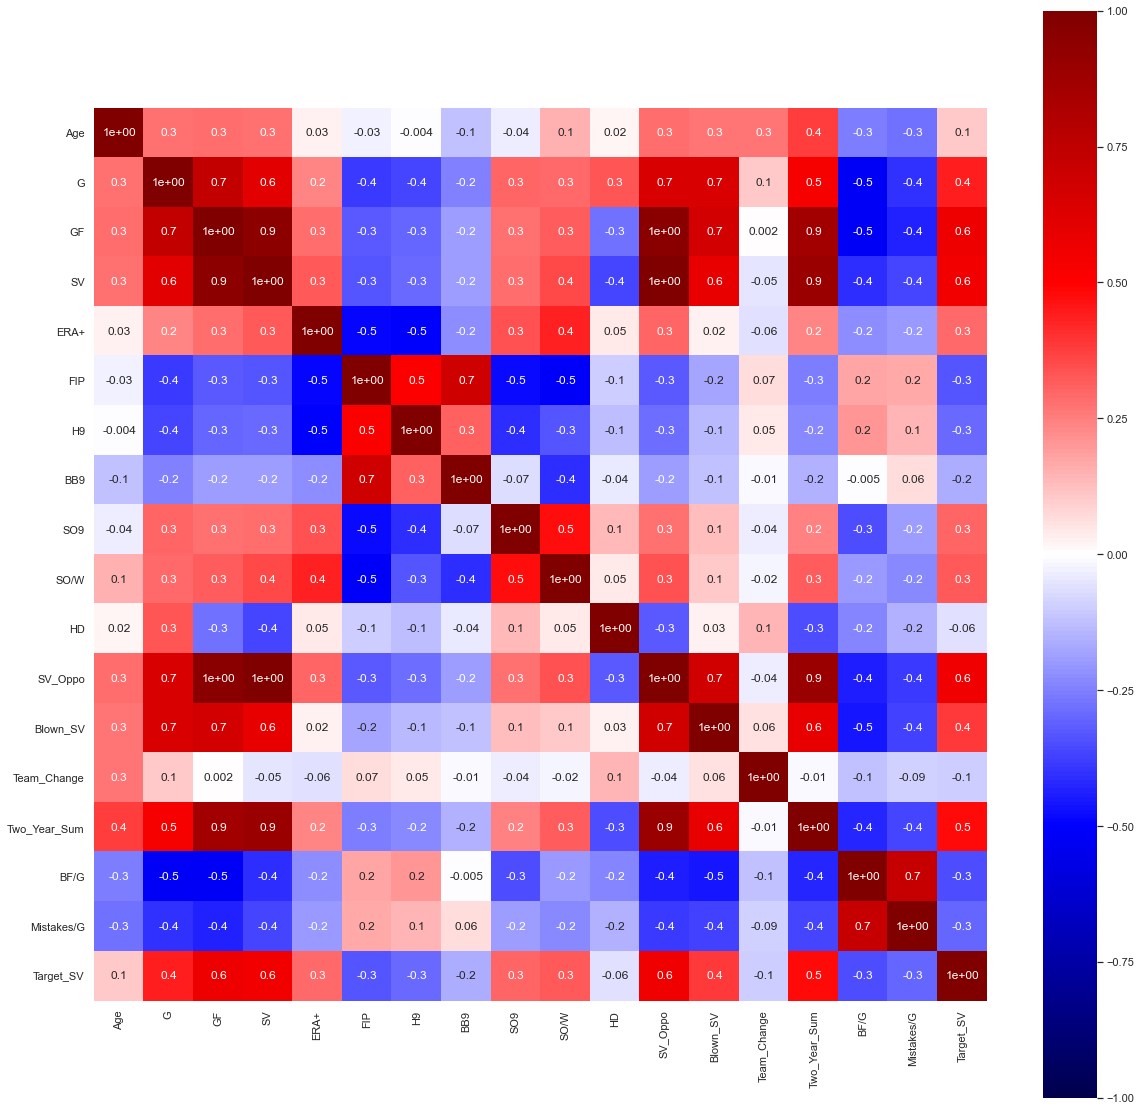

In [425]:
smaller_df.dropna(inplace=True)
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(smaller_df.corr(), cmap='seismic',annot=True, fmt=".1", vmin=-1,vmax=1,square=True);

In [18]:
from pandas_profiling import ProfileReport
profile = ProfileReport(smaller_df, title="Profile Report on Predicting Saves", plot={'histogram': {'bins': 8}}, minimal=True)
profile.to_widgets()

# Notes from Heatmap  
## The features that show strongest correlation with the target saves value are:

Games Finished and Saves (.6)  
Two year sum of saves (.5)  
Three year sum of saves (.4)  
Cumulative sum of saves (.5)  

## The features showing smaller correlation include:

Age (.3)  
Games (.3)  
SO/W (.3)  
SO/9(.2)  
R (-.2)  
ER (-.2)  
H (-.2)  
BB (-.2)

## A few initial thoughts

Some of these statistics are probably overlapping in many ways. H and BB are important but they are also an indicator of Games or Innings Pitched. That's especially clear by WHIP having a lower correlation than either, despite being a metric that shows those two values combined. So, maybe I'll make a model using Games and WHIP, but not H or BB. A similar arguments could be made for other stats such as R, ER, and ERA. Again, if I'm including Games or Innings Pitched, I think it makes the most sense to drop R and ER and use ERA as a feature. The same will be done with SO vs. SO/9, BF.

I should also reconsider the initial size of our data set in terms of starting year. The low positive correlation between saves and years gives me hesitation. If saves are generally increasing across this time frame, am I gaining useful intelligence from earlier years? Maybe I should start in the mid 80s or 1990?

# Notes from second heatmap with above changes made

Our new statistics (BF/G and Mistakes/G) both show low negative correlations with our target saves columns

In [375]:
#modeling = metric_df.drop(columns = ['IP','HR','BF','Year','Name','Tm','Lg','GS','CG','SHO','Previous_Year_SV','Two_Year_Ago','HBP','BK','WP','R','ER','H','BB','IBB','SO'])
modeling = smaller_df.copy()
X = modeling.drop(columns='Target_SV')
y = modeling['Target_SV']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2)

X.head()

,Age,G,GF,SV,ERA+,FIP,H9,BB9,SO9,SO/W,HD,SV_Oppo,Blown_SV,Team_Change,Two_Year_Sum,BF/G,Mistakes/G
0,21,12,0,0,93,5.73,8.0,5.3,5.7,1.09,0,0,0,0,0,21.916667,0.166667
1,22,1,0,0,26,9.91,14.7,14.7,7.4,0.50,0,0,0,1,0,23.000000,0.000000
2,23,7,2,0,129,4.02,5.7,3.5,6.5,1.88,0,0,0,0,0,11.714286,0.142857
3,24,32,5,1,85,4.20,9.1,3.2,5.4,1.72,0,1,0,0,1,14.812500,0.218750
4,25,38,7,0,72,4.08,10.3,3.1,6.5,2.09,2,0,0,0,1,10.736842,0.131579


In [376]:
tr_X, valid_X, tr_y, valid_y = train_test_split(train_X, train_y, test_size = .25)


In [377]:
print(tr_X.shape)
print(train_X.shape)
print(test_X.shape)
print(valid_X.shape)

tr_X.head()

(771, 17)
(1028, 17)
(257, 17)
(257, 17)


,Age,G,GF,SV,ERA+,FIP,H9,BB9,SO9,SO/W,HD,SV_Oppo,Blown_SV,Team_Change,Two_Year_Sum,BF/G,Mistakes/G
1420,29,63,50,41,108,3.12,7.0,2.7,6.9,2.58,0,50,9,0,64,5.650794,0.047619
70,24,13,4,0,122,4.44,7.2,5.5,5.5,1.00,0,1,1,0,0,5.692308,0.538462
401,34,74,69,53,232,2.82,7.4,2.3,7.6,3.30,0,57,4,0,93,4.270270,0.067568
822,22,24,16,0,107,7.21,8.5,8.5,5.9,0.69,1,0,0,0,0,7.541667,0.250000
407,40,61,55,33,241,2.81,5.9,1.7,6.8,4.09,0,38,5,0,77,3.770492,0.081967


In [31]:

tr_X.isnull().sum()

Age                 0
W                   0
L                   0
ERA                 0
G                   0
GF                  0
SV                  0
IP                  0
HR                  0
BF                  0
ERA+                9
FIP                 0
WHIP                0
H9                  0
HR9                 0
BB9                 0
SO9                 0
SO/W                3
HD                  0
SV_Oppo             0
Blown_SV            0
Team_Change         0
Cumulative_Saves    0
Two_Year_Sum        0
Three_Year_Sum      0
BF/G                0
Mistakes/G          0
dtype: int64

# Minimum Viable Product
Predict our target saves using the previous year's saves as our feature. 

In [378]:
X_mvp = smaller_df[['SV']]
y = smaller_df['Target_SV']

from sklearn.model_selection import train_test_split
mvp_train_X, mvp_test_X, mvp_train_y, mvp_test_y = train_test_split(X_mvp, y, test_size = .2)

In [379]:
train_mvp_X, train_mvp_y = np.array(mvp_train_X), np.array(mvp_train_y)
#run the CV
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_mvp_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(train_mvp_X,train_mvp_y):
    
    _X, _y = train_mvp_X[train_ind], train_mvp_y[train_ind]
    X_val, y_val = train_mvp_X[val_ind], train_mvp_y[val_ind] 
    
    #simple linear regression
    mvp = LinearRegression()

    mvp.fit(_X, _y)
    cv_mvp_r2s.append(round(mvp.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_mvp_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_mvp_r2s):.3f} +- {np.std(cv_mvp_r2s):.3f}', '\n')

preds_mvp_test = mvp.predict(mvp_test_X)
RMSE_mvp = np.sqrt(mean_squared_error(mvp_test_y,preds_mvp_test))

print('The average error on a predicted value is: ',RMSE_mvp)

Simple regression scores:  [0.374, 0.205, 0.389, 0.23, 0.274] 

Simple mean cv r^2: 0.294 +- 0.075 

The average error on a predicted value is:  13.947875988146745


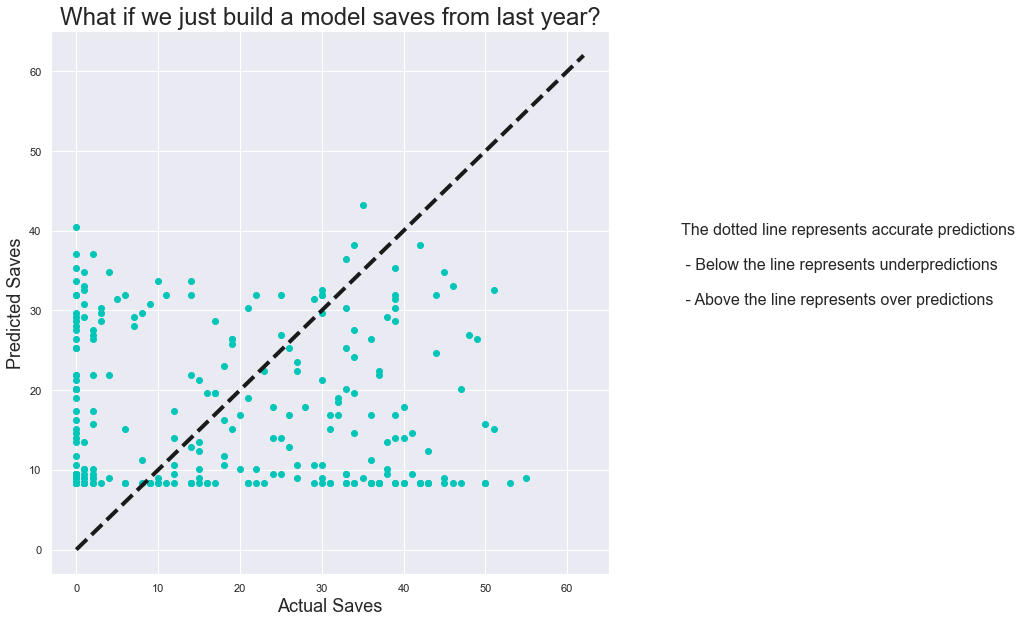

In [380]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_y, preds_mvp_test,color='#00c5b9ff')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves',fontsize=18)
ax.set_ylabel('Predicted Saves',fontsize=18)
ax.set_title('What if we just build a model saves from last year?',fontsize=24)
txt = 'The dotted line represents accurate predictions' + '\n \n'+' - Below the line represents underpredictions' + '\n\n'+ ' - Above the line represents over predictions'
text = fig.text(1,.5,txt,fontsize=16)
fig.savefig('OneDrive\Desktop\Metis\Projects\Project 2\wmvp_actualvspredicted',kind='png')
plt.show()

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Model on Multiple Features

In [381]:
model_1 = LinearRegression()
model_1.fit(tr_X, tr_y)
score = model_1.score(tr_X, tr_y)
print('The coefficient of determination for model_1 is: ',score )
print(f'In other words, approximately {score} of the variability in saves can be explained by the linear model')


test_score = model_1.score(test_X, test_y)
print('The coefficient of determination for model_1 is: ',test_score )
print(f'In other words, approximately {test_score} of the variability in saves can be explained by the linear model')

The coefficient of determination for model_1 is:  0.383998273794522
In other words, approximately 0.383998273794522 of the variability in saves can be explained by the linear model
The coefficient of determination for model_1 is:  0.4044030303990557
In other words, approximately 0.4044030303990557 of the variability in saves can be explained by the linear model


In [382]:
from sklearn.metrics import mean_squared_error
preds_train = model_1.predict(tr_X)
RMSE_train_1 = np.sqrt(mean_squared_error(tr_y,preds_train))

print('The error on the training data is: ',RMSE_train_1)

preds_test = model_1.predict(test_X)
RMSE_model_1 = np.sqrt(mean_squared_error(test_y,preds_test))

print('The error on the test data is: ',RMSE_model_1)

The error on the training data is:  13.070910258333049
The error on the test data is:  12.70748630840012


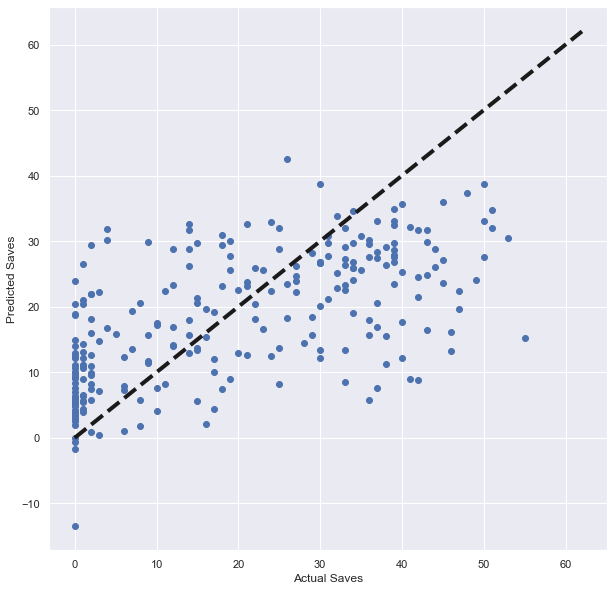

In [383]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_y, preds_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

# K Fold Cross-Val on Simple Linear Regression

In [384]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

train_X1, train_y1 = np.array(train_X), np.array(train_y)
#run the CV
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(train_X,train_y):
    
    _X, _y = train_X1[train_ind], train_y1[train_ind]
    X_val, y_val = train_X1[val_ind], train_y1[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(_X, _y)
    cv_lm_r2s.append(round(lm.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_lm_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

preds_kfoldlinear_test = lm.predict(test_X)
RMSE_kfoldlinear = np.sqrt(mean_squared_error(test_y,preds_kfoldlinear_test))

print('The average error on a predicted value is: ', RMSE_kfoldlinear)

Simple regression scores:  [0.294, 0.396, 0.419, 0.375, 0.276] 

Simple mean cv r^2: 0.352 +- 0.057
The average error on a predicted value is:  12.497504290962103


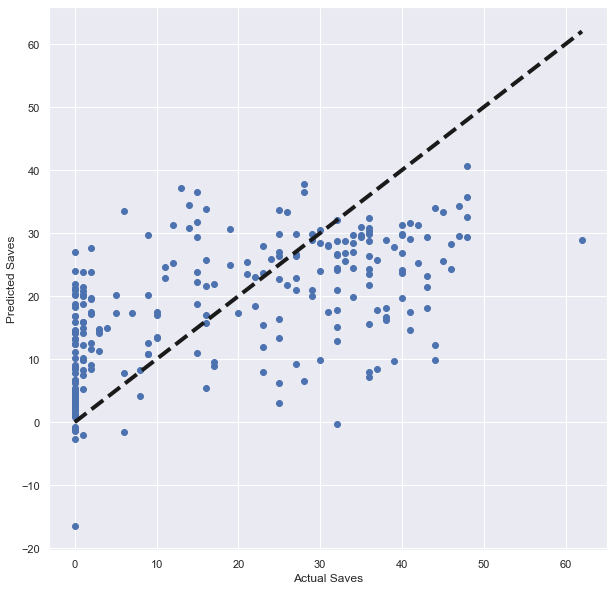

In [182]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_y, preds_kfoldlinear_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

# K Fold Cross-Val on Polynomial Model of Degree 2 + Feature Selection

In [191]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_lm_poly_r2s = []

for train_ind, val_ind in kf.split(train_X, train_y):    
    
    _X, _y = train_X1[train_ind], train_y1[train_ind]
    X_val, y_val = train_X1[val_ind], train_y1[val_ind] 
    
    #poly with degree 2
    poly = PolynomialFeatures(degree=2,interaction_only=True)

    X_train_poly = poly.fit_transform(_X)
    X_val_poly = poly.transform(X_val)

    lm_poly = LinearRegression()
    
    lm_poly.fit(X_train_poly, _y)
    cv_lm_poly_r2s.append(round(lm_poly.score(X_val_poly, y_val), 3))
    
print('Poly scores: ', cv_lm_poly_r2s, '\n')

print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')

std_poly = StandardScaler()
std_poly.fit(X_train_poly)
X_polylasso = std_poly.transform(X_train_poly)

lasso_poly =  LassoCV(alphas = alphavec, cv = 5)
lasso_poly.fit(X_train_poly,_y)
list(zip(poly.get_feature_names(train_X.columns), lasso_poly.coef_))


Poly scores:  [-0.114, 0.058, 0.185, 0.387, 0.183] 

Poly mean cv r^2: 0.140 +- 0.165


C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.96542477030016, tolerance: 18.349219604863222
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.861183973553125, tolerance: 18.349219604863222
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.74508046658593, tolerance: 18.349219604863222
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525

[('1', 0.0),
 ('Age', -0.0),
 ('G', 0.0),
 ('GF', 0.0),
 ('SV', 0.0),
 ('ERA+', 0.0),
 ('FIP', -0.0),
 ('H9', -0.0),
 ('BB9', -0.0),
 ('SO9', 0.0),
 ('SO/W', 0.0),
 ('HD', 0.0),
 ('SV_Oppo', 0.0),
 ('Blown_SV', -0.0),
 ('Team_Change', -0.0),
 ('Two_Year_Sum', 0.0),
 ('BF/G', -0.0),
 ('Mistakes/G', -0.0),
 ('Age G', -0.0029255147582070602),
 ('Age GF', -0.0),
 ('Age SV', 0.0),
 ('Age ERA+', -6.808125259608943e-05),
 ('Age FIP', -0.008357995512096634),
 ('Age H9', -0.013577865702798992),
 ('Age BB9', -0.0),
 ('Age SO9', -0.0),
 ('Age SO/W', 0.0),
 ('Age HD', 0.0),
 ('Age SV_Oppo', 0.0),
 ('Age Blown_SV', -0.0),
 ('Age Team_Change', -0.0),
 ('Age Two_Year_Sum', 0.003498001154515214),
 ('Age BF/G', -0.0),
 ('Age Mistakes/G', -0.0),
 ('G GF', 0.0015700971526202236),
 ('G SV', 0.0025343975914217183),
 ('G ERA+', -0.0),
 ('G FIP', -0.011852720488205463),
 ('G H9', -0.0),
 ('G BB9', -0.0055790841008742514),
 ('G SO9', -0.0),
 ('G SO/W', 0.011091668489031469),
 ('G HD', 0.0020161875087268627),


# LASSO

In [385]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(train_X.values)

## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(train_X.values)

## Apply the scaler to the test set

X_te = std.transform(test_X.values)

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, train_y)

# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.89338196249446, tolerance: 28.66527509727626
  model = cd_fast.enet_coordinate_descent(


0.027682866303920667

In [413]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(train_X.columns, ridge_model.coef_))

[('Age', -0.9040682521501043),
 ('G', -1.9929670979526108),
 ('GF', 5.871726264952066),
 ('SV', 2.2667934322167937),
 ('ERA+', 0.21054404481277528),
 ('FIP', -2.0743834707060462),
 ('H9', -0.9257478120374173),
 ('BB9', 1.1744344394705413),
 ('SO9', 0.21218585006374438),
 ('SO/W', 1.5467296453951358),
 ('HD', 2.4221374625261274),
 ('SV_Oppo', 2.1197417408690384),
 ('Blown_SV', 0.5113791127364495),
 ('Team_Change', -1.2134657124850732),
 ('Two_Year_Sum', -0.6089993899180582),
 ('BF/G', -0.28101883821326445),
 ('Mistakes/G', -0.4025156691815675)]

In [412]:
np.sort(np.absolute(lasso_model.coef_))
np.sort(np.absolute(ridge_model.coef_))

array([0.21054404, 0.21218585, 0.28101884, 0.40251567, 0.51137911,
       0.60899939, 0.90406825, 0.92574781, 1.17443444, 1.21346571,
       1.54672965, 1.9929671 , 2.07438347, 2.11974174, 2.26679343,
       2.42213746, 5.87172626])

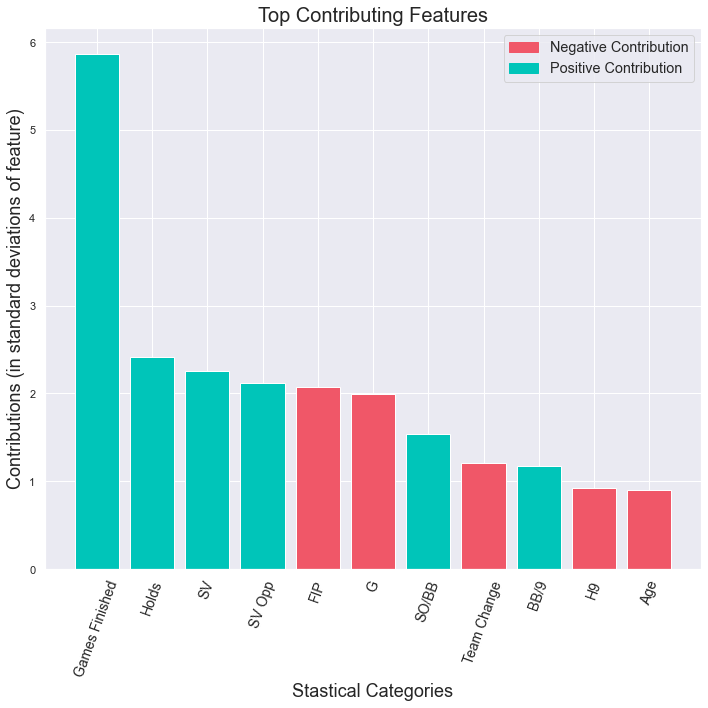

In [416]:
import matplotlib.patches as mpatches
coef = [5.87,2.42,2.26,2.12,2.07,1.99,1.54,1.21,1.17,.92,.904]
feat = ['Games Finished','Holds','SV','SV Opp','FIP','G','SO/BB','Team Change','BB/9','H9','Age']
plt.bar(feat, coef,color=['#00c5b9ff','#00c5b9ff','#00c5b9ff','#00c5b9ff','#f05768','#f05768','#00c5b9ff','#f05768','#00c5b9ff','#f05768','#f05768'])
plt.xticks(feat,rotation=70, fontsize=14)

plt.title('Top Contributing Features',fontsize=20)
plt.xlabel('Stastical Categories',fontsize=18)
plt.ylabel('Contributions (in standard deviations of feature)',fontsize=18)
green_patch = mpatches.Patch(color='#00c5b9ff', label='Positive Contribution')
red_patch = mpatches.Patch(color='#f05768', label='Negative Contribution')
plt.legend(handles=[red_patch,green_patch],fontsize='large')
plt.tight_layout()
plt.savefig('OneDrive\Desktop\Metis\Projects\Project 2\wridge_coefficients',kind='png')
plt.show();

In [388]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [389]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

# Find the MAE and R^2 on the test set using this model
mae(test_y, test_set_pred)

10.20036056370343

In [390]:
r2_score(test_y, test_set_pred)

0.41610497996187423

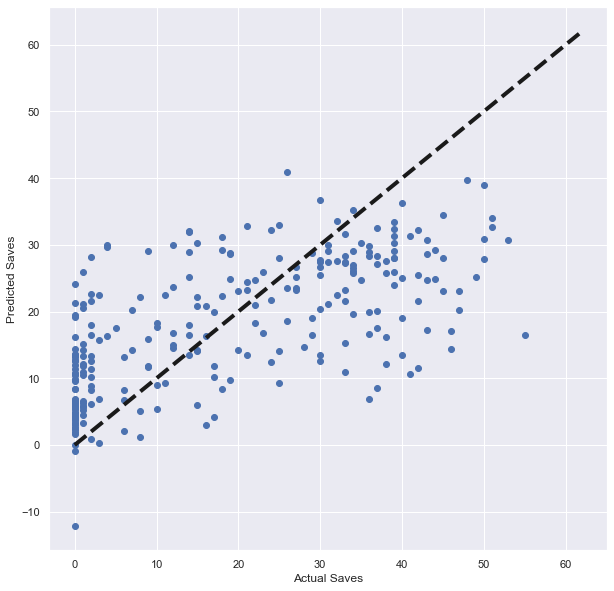

In [391]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_y, test_set_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Saves')
ax.set_ylabel('Predicted Saves')
plt.show()

# Ridge

In [392]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(train_X.values)

## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(train_X.values)

## Apply the scaler to the test set

X_te = std.transform(test_X.values)

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, train_y)

# This is the best alpha value it found - not far from the value
# selected using simple validation
ridge_model.alpha_

10.353218432956627

In [393]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(train_X.columns, ridge_model.coef_))

[('Age', -0.9040682521501043),
 ('G', -1.9929670979526108),
 ('GF', 5.871726264952066),
 ('SV', 2.2667934322167937),
 ('ERA+', 0.21054404481277528),
 ('FIP', -2.0743834707060462),
 ('H9', -0.9257478120374173),
 ('BB9', 1.1744344394705413),
 ('SO9', 0.21218585006374438),
 ('SO/W', 1.5467296453951358),
 ('HD', 2.4221374625261274),
 ('SV_Oppo', 2.1197417408690384),
 ('Blown_SV', 0.5113791127364495),
 ('Team_Change', -1.2134657124850732),
 ('Two_Year_Sum', -0.6089993899180582),
 ('BF/G', -0.28101883821326445),
 ('Mistakes/G', -0.4025156691815675)]

In [394]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)

In [395]:
RMSE_ridge = np.sqrt(mean_squared_error(test_y,test_set_pred))
RMSE_ridge

12.61277924599258

In [396]:
r2_score(test_y, test_set_pred)

0.4132477445300381

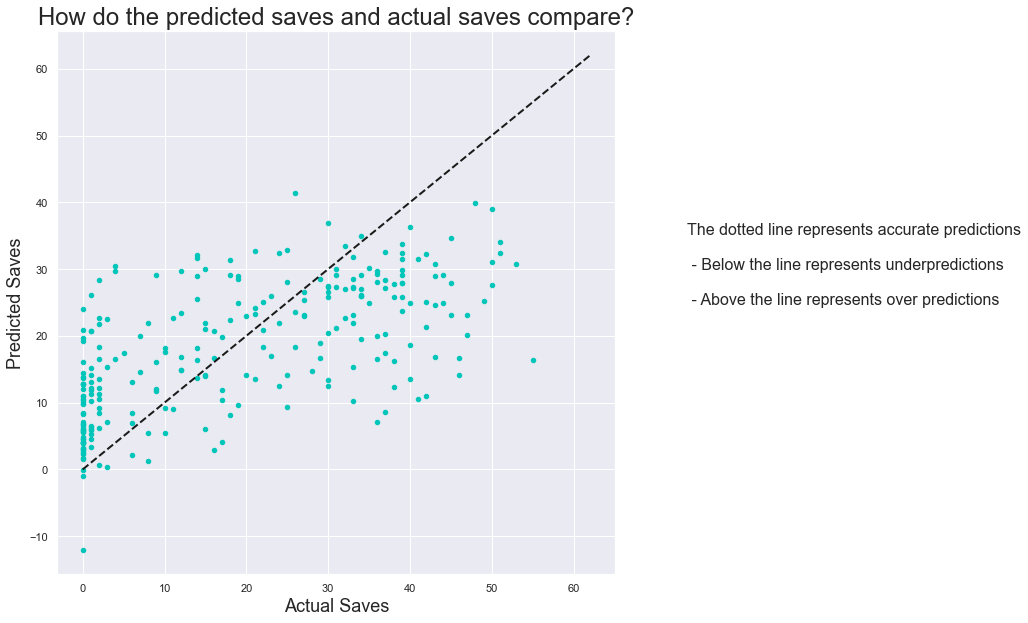

In [397]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_y, test_set_pred, s=20,color='#00c5b9ff')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Actual Saves',fontsize=18)
ax.set_ylabel('Predicted Saves',fontsize=18)
ax.set_title('How do the predicted saves and actual saves compare?',fontsize=24)
txt = 'The dotted line represents accurate predictions' + '\n \n'+' - Below the line represents underpredictions' + '\n\n'+ ' - Above the line represents over predictions'
text = fig.text(1,.5,txt,fontsize=16)
fig.savefig('OneDrive\Desktop\Metis\Projects\Project 2\wridge_actualvspredicted',kind='png')
plt.show()

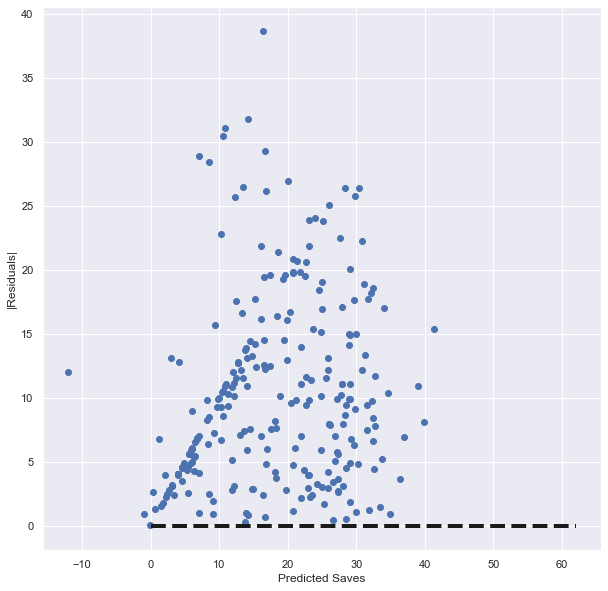

In [398]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots()
ax.scatter(test_set_pred, np.absolute(test_y-test_set_pred))
ax.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
ax.set_xlabel('Predicted Saves')
ax.set_ylabel('|Residuals|')
plt.show()

In [399]:
metric_df['Residuals'] = np.absolute(test_y-test_set_pred)
metric_df.sort_values('Residuals',ascending=False).head(40)


,Name,Year,Age,Tm,Lg,W,L,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,HD,SV_Oppo,Blown_SV,Team_Change,Cumulative_Saves,Previous_Year_SV,Two_Year_Ago,Two_Year_Sum,Three_Year_Sum,BF/G,Mistakes/G,Target_SV,Residuals
864,John Smoltz,2001,34,ATL,NL,3,3,3.36,36,5,20,0,0,10,59.0,53,24,22,7,10,2,57,2,0,0,238,133,3.27,1.068,8.1,1.1,1.5,8.7,5.70,5,11,1,0,10,0,0,10,10,6.611111,0.055556,55,38.625863
878,José Mesa,1994,28,CLE,AL,7,5,3.82,51,0,22,0,0,2,73.0,71,33,31,3,26,7,63,3,0,3,315,123,3.13,1.329,8.8,0.4,3.2,7.8,2.42,8,6,4,0,2,0,0,2,2,6.176471,0.117647,46,31.798574
884,José Mesa,2000,34,SEA,AL,4,6,5.36,66,0,29,0,0,1,80.2,89,48,48,11,41,0,84,5,0,3,372,86,4.53,1.612,9.9,1.2,4.6,9.4,2.05,11,3,2,0,138,33,1,34,35,5.636364,0.121212,42,31.081468
688,Trevor Hoffman,2003,35,SDP,NL,0,0,2.00,9,0,7,0,0,0,9.0,7,2,2,1,3,0,11,0,0,0,36,206,3.03,1.111,7.0,1.0,3.0,11.0,3.67,0,0,0,0,352,38,43,38,81,4.000000,0.000000,41,30.487861
982,Mike Williams,2001,32,TOT,NL,6,4,3.80,65,0,48,0,0,22,64.0,60,28,27,9,35,3,59,0,0,2,285,122,4.67,1.484,8.4,1.3,4.9,8.3,1.69,3,25,3,1,70,24,23,46,69,4.384615,0.030769,46,29.297284
1209,Doug Jones,1996,39,TOT,MLB,7,2,4.22,52,0,21,0,0,3,64.0,72,33,30,7,20,6,60,3,0,1,282,114,3.80,1.438,10.1,1.0,2.8,8.4,3.00,2,11,8,1,242,22,27,25,52,5.423077,0.076923,36,28.893655
310,Jeanmar Gómez,2015,27,PHI,NL,2,3,3.01,65,0,21,0,0,0,74.2,82,28,25,4,17,4,50,2,0,3,319,128,3.25,1.326,9.9,0.5,2.0,6.0,2.94,7,3,3,1,1,1,0,1,1,4.907692,0.076923,37,28.427460
497,José Valverde,2006,28,ARI,NL,2,3,5.84,44,0,35,0,0,18,49.1,50,32,32,6,22,3,69,2,0,2,223,81,3.39,1.459,9.1,1.1,4.0,12.6,3.14,1,22,4,0,51,15,8,33,41,5.068182,0.090909,47,26.902219
758,Todd Jones,2004,36,TOT,NL,11,5,4.15,78,0,16,0,0,2,82.1,84,39,38,7,33,5,59,6,0,2,358,105,4.14,1.421,9.2,0.8,3.6,6.4,1.79,27,8,6,0,186,0,1,2,3,4.589744,0.102564,40,26.454754
529,Drew Storen,2011,23,WSN,NL,6,3,2.75,73,0,52,0,0,43,75.1,57,24,23,8,20,4,74,2,0,2,303,140,3.32,1.022,6.8,1.0,2.4,8.8,3.70,3,48,5,0,48,5,0,48,48,4.150685,0.054795,4,26.405709


In [400]:
model_2019= df_2019.drop(columns = ['W','L','WHIP','HR9','ERA','Three_Year_Sum','Cumulative_Saves','IP','HR','BF','Year','Name','Tm','Lg','GS','CG','SHO','Previous_Year_SV','Two_Year_Ago','HBP','BK','WP','R','ER','H','BB','IBB','SO'])

X_2019 = model_2019.drop(columns='Target_SV')
y_2019 = model_2019['Target_SV']

#Standardize the data from 2019 based on previous data
transform_2019 = std.transform(X_2019.values)
print(transform_2019.shape)
# Make predictions for next years
predictions_2020 = lasso_model.predict(transform_2019)
df_2019['Predictions 2020'] = predictions_2020*60/162
df_2019['Shortened 2020']= df_2019['Target_SV']
df_2019[['Name','Tm','SV','Predictions 2020','Shortened 2020']].sort_values(by=df_2019['Shortened 2020'])

(36, 17)


KeyError: 8      16
18     14
22     13
30     12
41     12
49     12
60     11
68     11
80     11
90     10
97      2
103     1
113     3
121     0
127     8
132     9
145     0
150     6
162     2
173     2
180     1
186     0
192     0
201     0
211     6
235     0
241     1
250     0
260     8
292     0
304     0
314     0
355     4
365     0
457     5
591     2
Name: Shortened 2020, dtype: Int64

In [408]:
#Standardize the data from 2019 based on previous data
transform_2019 = std.transform(X_2019.values)
print(transform_2019.shape)
# Make predictions for next years
predictions_2020 = ridge_model.predict(transform_2019)
df_2019['Predictions 2020'] = predictions_2020*60/162
df_2019['Shortened 2020']= df_2019['Target_SV']
df_2019[['Name','Tm','Predictions 2020','Shortened 2020']].sort_values(by=['Shortened 2020'],ascending=False).head(20)

(36, 17)


,Name,Tm,Predictions 2020,Shortened 2020
8,Brad Hand,CLE,9.706878,16
18,Liam Hendriks,OAK,10.582459,14
22,Josh Hader,MIL,12.635866,13
30,Alex Colomé,CHW,7.986627,12
41,Brandon Kintzler,CHC,3.515879,12
49,Ryan Pressly,HOU,7.578048,12
60,Kenley Jansen,LAD,10.028261,11
68,Trevor Rosenthal,TOT,1.550649,11
80,Mark Melancon,TOT,4.944614,11
90,Daniel Hudson,TOT,4.598647,10


In [409]:
df_2019[['Name','Tm','Predictions 2020','Shortened 2020']].sort_values(by=['Predictions 2020'],ascending=False).head(20)

,Name,Tm,Predictions 2020,Shortened 2020
97,Kirby Yates,SDP,12.788093,2
22,Josh Hader,MIL,12.635866,13
132,Taylor Rogers,MIN,11.192820,9
113,Aroldis Chapman,NYY,11.012168,3
103,Roberto Osuna,HOU,10.926190,1
186,Felipe Vázquez,PIT,10.784351,0
18,Liam Hendriks,OAK,10.582459,14
121,Will Smith,SFG,10.477584,0
127,Raisel Iglesias,CIN,10.236867,8
60,Kenley Jansen,LAD,10.028261,11


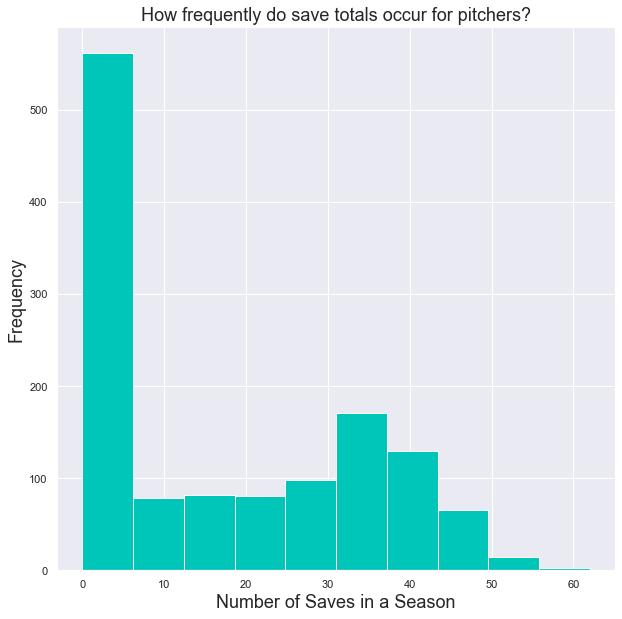

In [423]:
saves = metric_df['SV']
plt.hist(saves,bins=10,color='#00c5b9ff')
plt.xlabel('Number of Saves in a Season',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('How frequently do save totals occur for pitchers?',fontsize=18)
plt.savefig('OneDrive\Desktop\Metis\Projects\Project 2\wsaves_hist',kind='png')
plt.show();

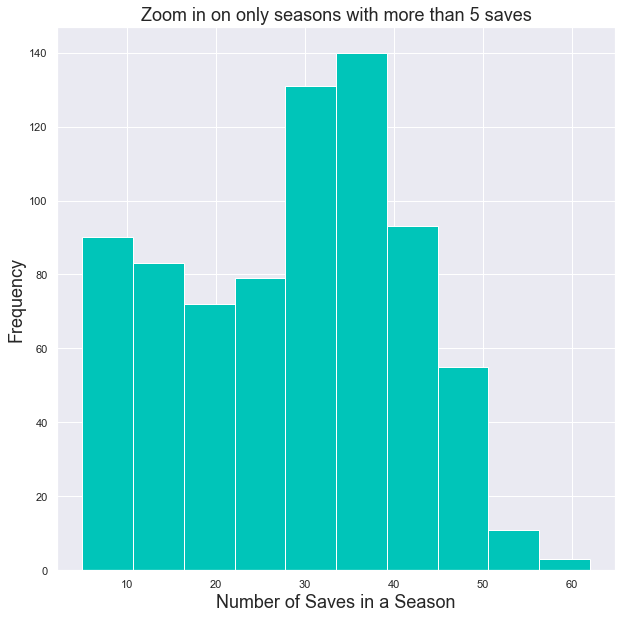

In [424]:
saves_nozero = metric_df.SV[metric_df['SV']>=5]
plt.hist(saves_nozero,color='#00c5b9ff')
plt.xlabel('Number of Saves in a Season',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Zoom in on only seasons with more than 5 saves',fontsize=18)
plt.savefig('OneDrive\Desktop\Metis\Projects\Project 2\wsaves_hist_nozeros',kind='png')
plt.show();